Exploratory data analysis on a dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data=pd.read_csv('/content/Cardiotocographic.csv')

In [5]:
df= data


In [7]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


1.Data Cleaning and Preparation:

In [6]:
# Display the first few rows of the dataset
print(df.head())

# Get information about the dataset (data types, non-null values, etc.)
print(df.info())

# Generate descriptive statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-n

In [9]:
# Check for missing values
if df is not None:
    missing_values = df.isnull().sum()
    print("Missing values per column:\n", missing_values)

Missing values per column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [18]:
# Identify and correct inconsistent data types
if df is not None:
    for col in df.columns:
        # Check if the column has numerical values stored as strings
        if pd.api.types.is_string_dtype(df[col]):
            try:
                # Attempt to convert the column to numeric
                df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' converts invalid parsing to NaN

                # Handle NaN values resulting from conversion (e.g., imputation)
                if df[col].isnull().any():
                    df[col] = df[col].fillna(df[col].mean()) # Impute with the mean (adjust as needed)

            except (ValueError, TypeError):
                print(f"Column '{col}' could not be converted to numeric. It may contain non-numeric values or formatting issues.")
                # Handle the error, e.g., leave the column as is or remove it.
                # Example: If the column is not crucial, you could remove it:
                # df.drop(columns=[col], inplace=True)
        elif pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_integer_dtype(df[col]):
            # Check for numerical columns that might have decimal values but are incorrectly represented as integers.
            # Handle these cases as needed, such as converting them to float
            if not df[col].apply(lambda x: isinstance(x, (int, float, complex))).all():
              try:
                  df[col] = df[col].astype(float)
              except ValueError as e:
                  print(f"Error converting {col} to float: {e}")


    # Print data types after conversion
    print("\nData types after conversion:\n", df.dtypes) #This line was incorrectly indented. Fixed by adjusting the indentation to align with the outer 'if' block
else:
    print("DataFrame is None. Cannot check data types.")


Data types after conversion:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [20]:
# 2. Outlier Detection and Treatment:
def detect_and_treat_outliers(df, column, method='iqr', threshold=1.5):
    """
    Detects and treats outliers in a specified column of a DataFrame.

    Args:
        df: The input DataFrame.
        column: The name of the column to check for outliers.
        method: The outlier detection method ('iqr' or 'zscore'). Default is 'iqr'.
        threshold: The threshold for outlier detection. Default is 1.5 for IQR.

    Returns:
        A new DataFrame with outliers treated.
    """
    df_copy = df.copy()  # Create a copy to avoid modifying the original DataFrame

    if method == 'iqr':
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_copy[column] = np.where((df_copy[column] < lower_bound) | (df_copy[column] > upper_bound),
                                   np.nan, df_copy[column])  # Mark outliers as NaN
    elif method == 'zscore':
        z_scores = np.abs(stats.zscore(df_copy[column]))
        df_copy[column] = np.where(z_scores > threshold, np.nan, df_copy[column]) # Mark outliers as NaN
    else:
        raise ValueError("Invalid outlier detection method. Choose 'iqr' or 'zscore'.")

    # Treat outliers (e.g., imputation with mean or median)
    df_copy[column] = df_copy[column].fillna(df_copy[column].median()) # Replace NaN values with the median


    return df_copy

# Example usage:
numerical_cols = df.select_dtypes(include=np.number).columns # Select only numeric columns to avoid error
for col in numerical_cols:
    df = detect_and_treat_outliers(df, col, method='iqr') # Apply IQR to detect outliers

# Verify the changes
print(df.describe())

                LB           AC      FM           UC           DL      DS  \
count  2126.000000  2126.000000  2126.0  2126.000000  2126.000000  2126.0   
mean    133.263990     0.002815     0.0     0.004341     0.000802     0.0   
std       9.743481     0.003354     0.0     0.002911     0.001489     0.0   
min     106.000000    -0.000185     0.0    -0.000132    -0.000124     0.0   
25%     126.000000     0.000000     0.0     0.001880     0.000000     0.0   
50%     133.000000     0.001547     0.0     0.004478     0.000000     0.0   
75%     140.000000     0.005004     0.0     0.006504     0.000931     0.0   
max     160.000000     0.012743     0.0     0.012987     0.005470     0.0   

           DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0    46.993632     1.194722     0.066161     7.373846   
std       0.0    17.157976     0.636521     0.335546     4.172742   
min       0.0    11.799846    

2.Statistical Summary:

In [22]:
# Generate descriptive statistics for all columns, including central tendency and dispersion
summary_stats = df.describe(include='all')

# Calculate the interquartile range (IQR) for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
summary_stats.loc['IQR', numerical_cols] = df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25)

print(summary_stats)

# Highlight interesting findings (example):
# Example 1: Large standard deviation in a specific variable
if summary_stats.loc['std', 'LB'] > 10: # Example variable
    print("The 'LB' variable shows a large standard deviation, indicating significant variability in the data.")

# Example 2: Skewness in a specific variable (requires additional calculations if not available in describe)
# Example 3: High percentage of missing values in a specific variable (check in the missing_values output from the previous code)

# Add more checks for other interesting patterns like correlations between variables
# or unusual values in categorical columns

                LB           AC      FM           UC           DL      DS  \
count  2126.000000  2126.000000  2126.0  2126.000000  2126.000000  2126.0   
mean    133.263990     0.002815     0.0     0.004341     0.000802     0.0   
std       9.743481     0.003354     0.0     0.002911     0.001489     0.0   
min     106.000000    -0.000185     0.0    -0.000132    -0.000124     0.0   
25%     126.000000     0.000000     0.0     0.001880     0.000000     0.0   
50%     133.000000     0.001547     0.0     0.004478     0.000000     0.0   
75%     140.000000     0.005004     0.0     0.006504     0.000931     0.0   
max     160.000000     0.012743     0.0     0.012987     0.005470     0.0   
IQR      14.000000     0.005004     0.0     0.004624     0.000931     0.0   

           DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0    46.993632     1.194722     0.066161     7.373846   
std       0.0    17.15

3.Data Visualization:

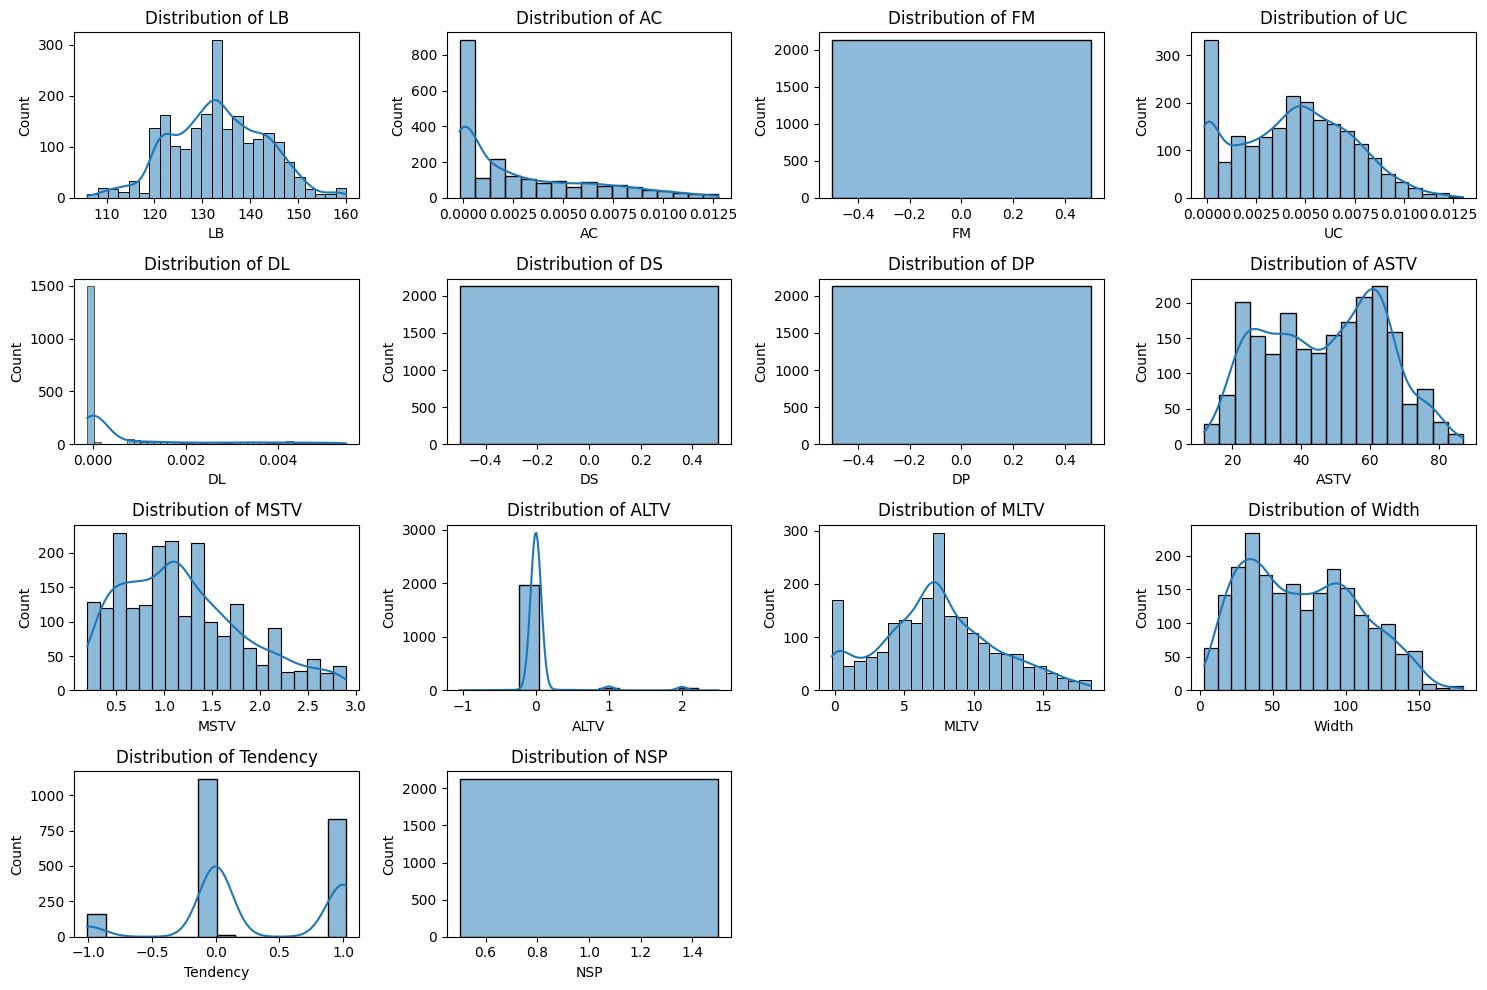

In [25]:
# Histograms for numerical variables
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for the subplot grid
num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4  # Calculate rows, ensuring at least 3 plots per row


for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 4, i + 1)  # Adjust subplot grid dynamically
    sns.histplot(df[col], kde=True)  # KDE for density estimation
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

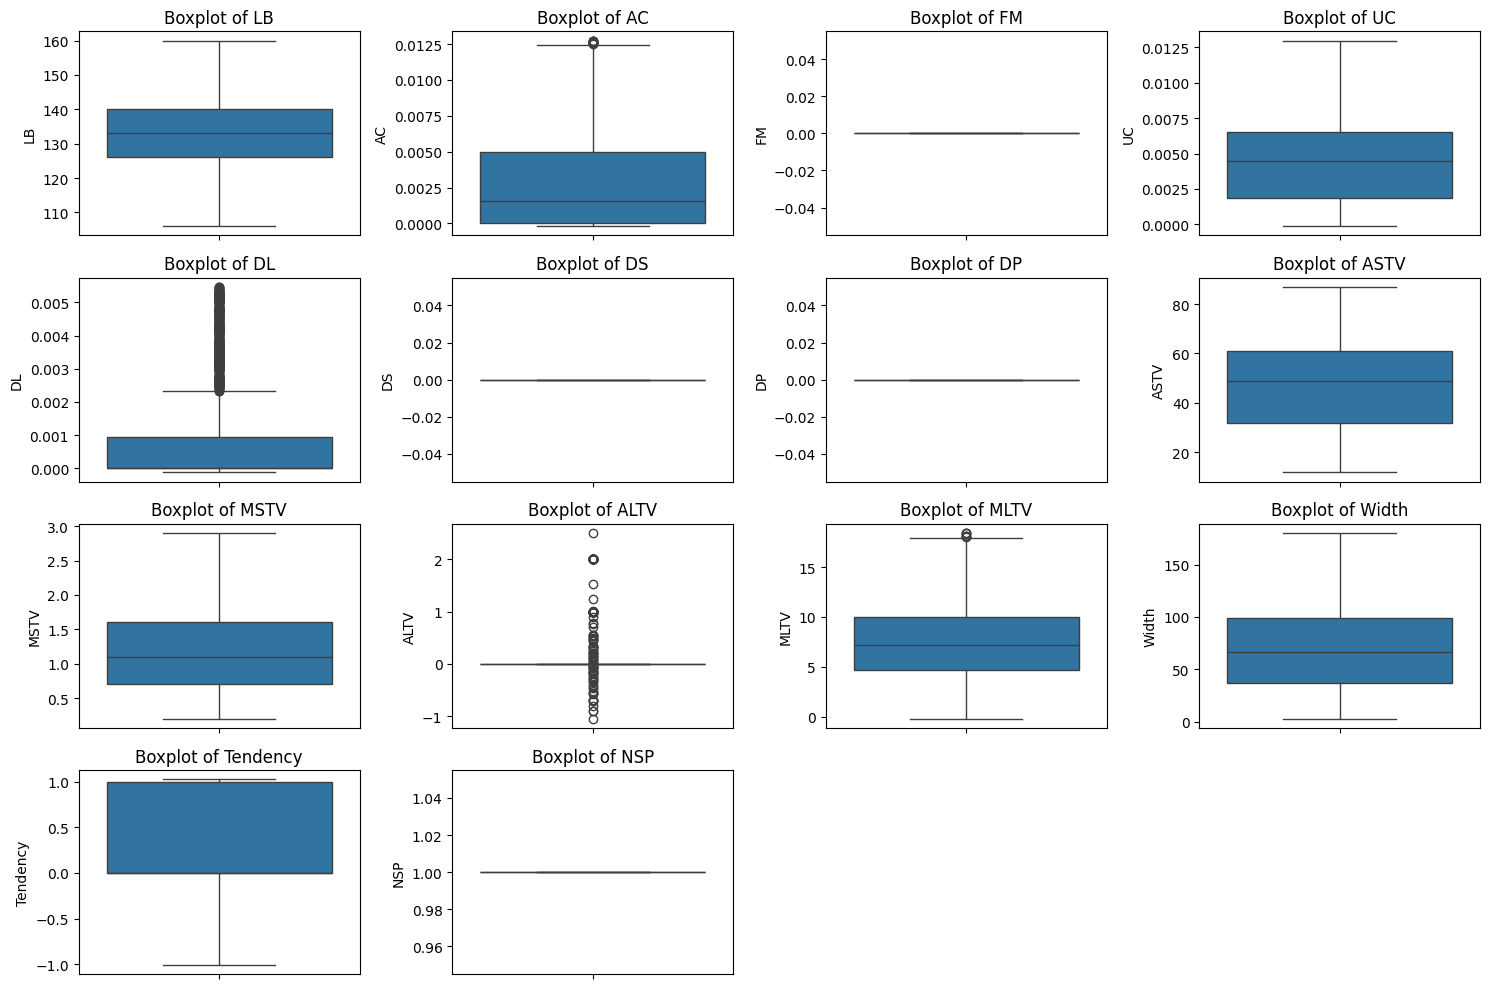

In [26]:
# Boxplots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 4, i + 1)  # Reuse the dynamic grid calculation
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

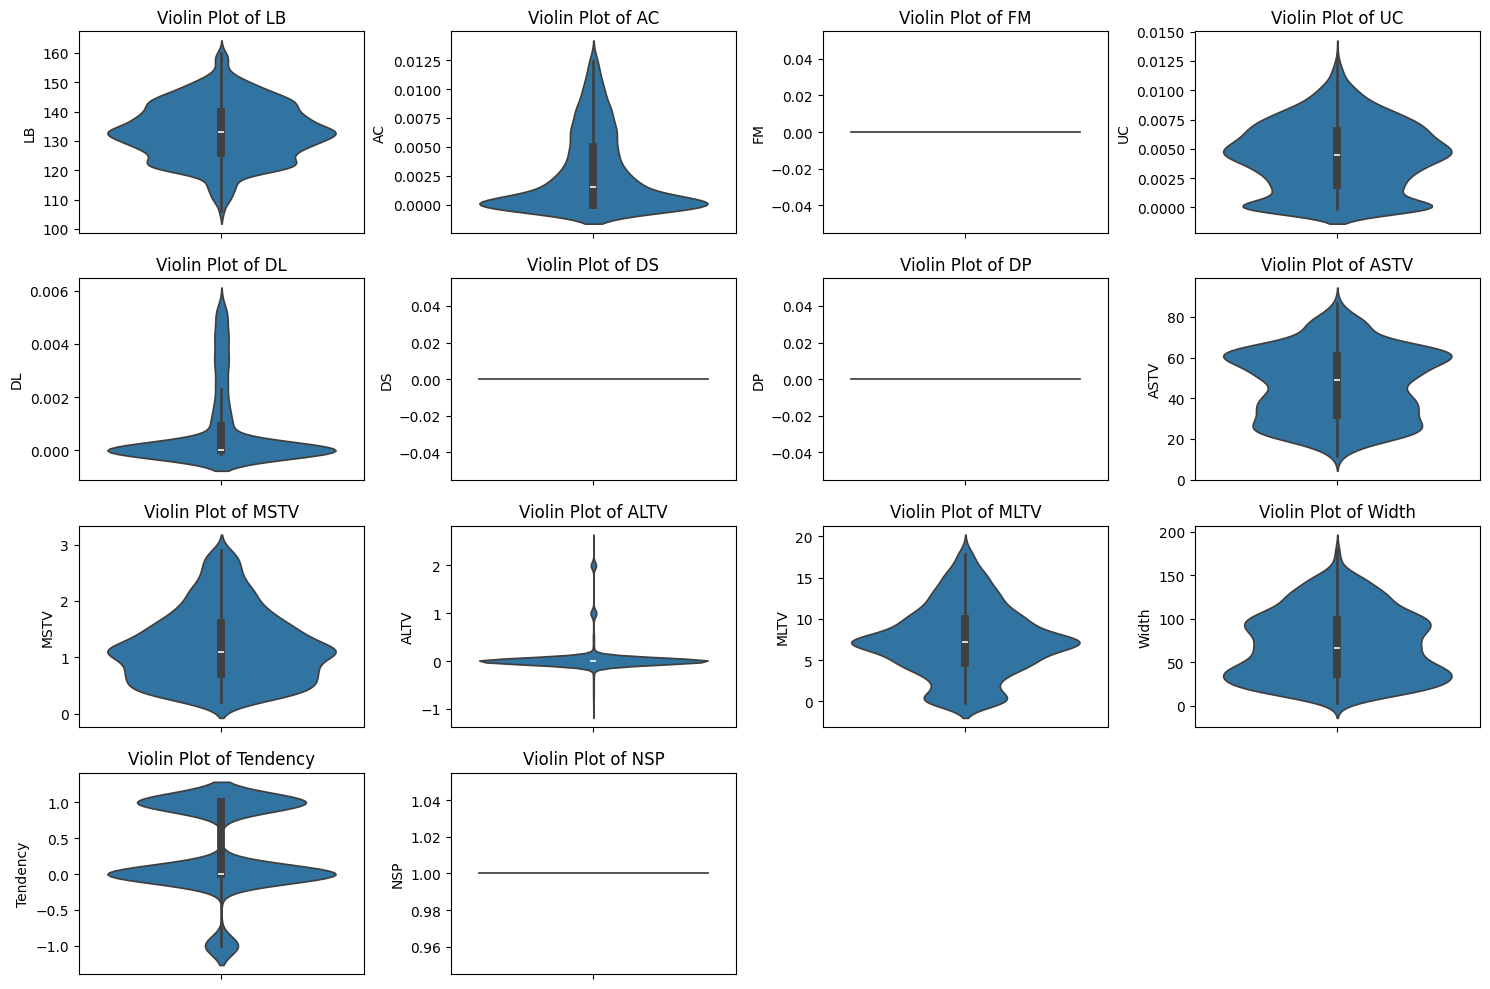

In [27]:
# Violin Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 4, i + 1)  # Reuse the dynamic grid calculation
    sns.violinplot(y=df[col])
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

4.Pattern Recognition and Insights:

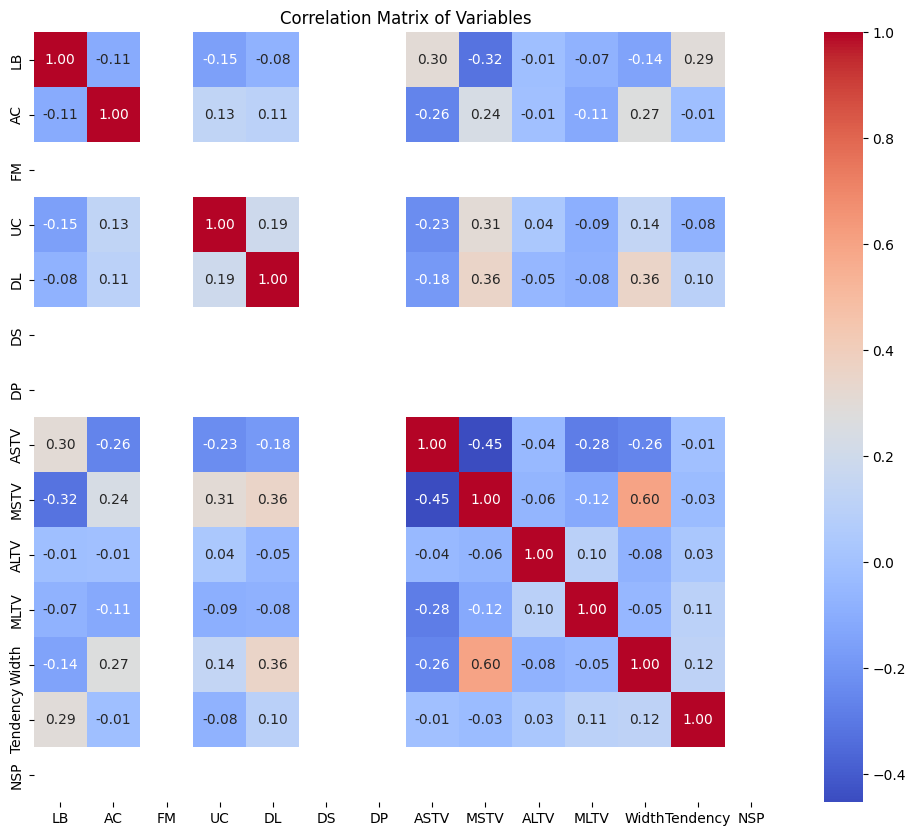


Strong correlations (absolute value > 0.7):
            LB   AC  FM   UC   DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0 NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN NaN  1.0  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN NaN  NaN  1.0 NaN NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN NaN  NaN  NaN NaN NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN NaN  NaN  NaN NaN NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN NaN  NaN  NaN NaN NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN NaN  NaN  NaN NaN NaN   NaN   NaN  

In [37]:

# Correlation analysis
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Identify strong correlations (e.g., above 0.7 or below -0.7)
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.7]

print("\nStrong correlations (absolute value > 0.7):\n", strong_correlations)

# Check if 'MST' and 'MLTV' columns exist before accessing them
if 'MST' in correlation_matrix.index and 'MLTV' in correlation_matrix.columns:
    if abs(correlation_matrix.loc['MST', 'MLTV']) > 0.7:
        print("\nExample: There is a strong correlation between 'MST' and 'MLTV'.")
        print("This suggests that changes in 'MST' are often associated with changes in 'MLTV'.")
        print("Further investigation is needed to determine the causal relationship (if any) and the practical implications of this correlation.")
else:
    print(f"Either 'MST' or 'MLTV' is not in the correlation matrix. Available columns: {correlation_matrix.columns.tolist()}")
    # You can add a breakpoint here to inspect why these columns might be missing
    # import pdb; pdb.set_trace()

# Add more examples and interpretations based on other strong correlations
# found in your correlation analysis, but check for column existence first.

In [40]:


# Assuming your DataFrame 'df' has a column representing time (e.g., 'Date', 'Time', or a timestamp)
# and another column representing the variable you want to analyze over time (e.g., 'Value', 'Sales', etc.).

# Convert the time column to datetime objects if it isn't already
# **Check if there's a relevant time column in your DataFrame**
# If you have a column representing time (e.g., 'Date', 'Time'), replace 'time_column' below
# with the actual column name. If not, you might need to create one or reconsider your analysis.
time_column = 'time_column'  # Replace with your actual time column name if available

if time_column in df.columns:
    df[time_column] = pd.to_datetime(df[time_column])  # Adjust date format if necessary
    # Set the time column as the index
    df = df.set_index(time_column)

    # Now you can resample:
    monthly_data = df['LB'].resample('M').mean()  # Replace 'LB' with your variable column
else:
    print(f"No time column named '{time_column}' found in the DataFrame. "
          "Please provide the correct time column name or consider creating one "
          "if temporal analysis is needed.")
    # Handle the case where there's no time column appropriately,
    # e.g., skip the temporal analysis or provide alternative solutions

# ... (rest of the code for plotting and analysis)

No time column named 'time_column' found in the DataFrame. Please provide the correct time column name or consider creating one if temporal analysis is needed.
